In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gd=pd.read_csv("gld_price_data.csv")

In [3]:
gd.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gd.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gd.shape

(2290, 6)

In [6]:
gd.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

gd.describe()

In [8]:
crn = gd.corr()

<AxesSubplot:>

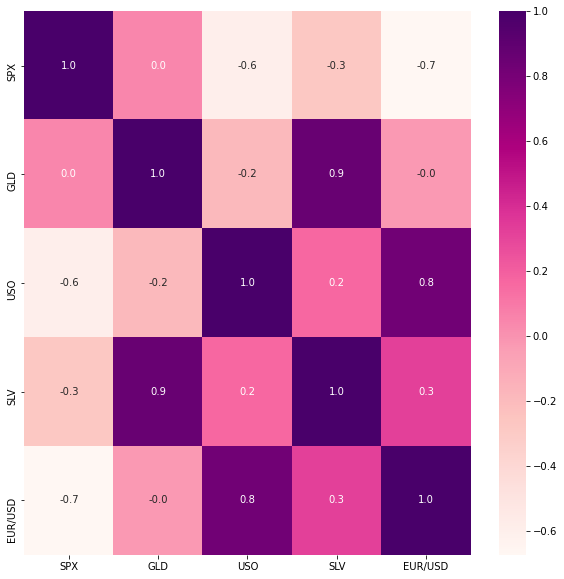

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(crn,annot=True,fmt=".1f",cmap="RdPu")

In [10]:
print(crn["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

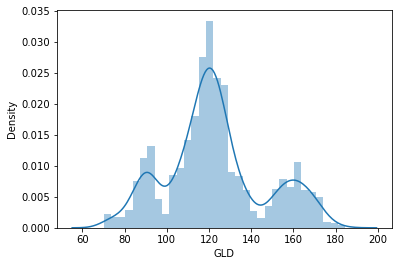

In [11]:
sns.distplot(gd["GLD"])

In [12]:
features = gd.drop(["Date", "GLD"],axis=1)
print(features)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [13]:
gld_price=gd["GLD"]
print(gld_price)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
features_train, features_test, gld_price_train, gld_price_test = train_test_split(features, gld_price, test_size=0.2, random_state=1)                

In [15]:
reg = RandomForestRegressor(n_estimators=100)

In [16]:
reg.fit(features_train, gld_price_train)

RandomForestRegressor()

In [17]:
test_data_pred = reg.predict(features_test)
print(test_data_pred)

[113.54289996 148.13720104 142.24659824 112.66520161 113.60599931
  95.57579936 111.75259999  93.30399923 120.89030087 127.0308993
 147.68109915 120.65559883 119.04850058  88.05610028  96.12119991
  92.73409878 116.78720071  88.80229881 125.25150074 114.6765998
 118.9059996  152.65540277 122.5998981  119.81009987 171.23399964
 108.42019838 120.46470024  87.12819846  87.79920082  88.65989918
 121.40210083 154.39080086 150.27189838 125.86220025 126.43839995
  91.04839877 156.80149938 121.35500153 106.58250039 144.33629693
  92.60940003 127.66660081 117.48270087 152.63500186 119.42259958
  91.2921016   80.18799961 120.35430175 132.36290039 118.95569918
 127.25990078 165.94399976 153.1603002   92.60979919 149.28370062
 151.82009942 112.75750096 112.72260025  87.19669875 127.78519946
 125.25500009 151.69220312 114.41829993 110.55359986 161.53669826
 117.24209872 108.28890089 132.10789933 132.81940134 125.53040004
 117.00390027 149.7620019  156.1009007  168.94989555 109.94630066
 140.5203980

In [18]:
error_value = metrics.r2_score(gld_price_test, test_data_pred)

In [19]:
print("Error value on the basis of R squared error : ", error_value)

Error value on the basis of R squared error :  0.9881219665286479
